In [1]:
import xarray
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from netCDF4 import Dataset
import datetime
import numpy as np
import netCDF4 as netcdf
import pandas as pd
import octant.roms as roms
import cartopy
import cartopy.crs as ccrs  # commonly used shorthand
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

%matplotlib inline

In [2]:
def make_map(fig, ax):
    ax.set_extent(extent) #extent es la delimitacion del mapa
    ax.coastlines(res) # la resolucion de la costa (10 m)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land', facecolor=cfeature.COLORS['land'],
                                                scale=res)) #add land
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor=cfeature.COLORS['water'], facecolor='none',
                                                scale=res)) #add rivers
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='lakes',
                                                scale=res,
                                               edgecolor='none', facecolor=cfeature.COLORS['water']))

    #la grilla:
#     gl = ax.gridlines(xlocs=[-97.3, -97.2], ylocs=np.arange(lat_bot, lat_top+1),
#                       draw_labels=True, linewidth=0.5, color='k', linestyle=':')
#     gl.xlabels_top = gl.ylabels_right = False
#     gl.xformatter = LONGITUDE_FORMATTER
#     gl.yformatter = LATITUDE_FORMATTER

In [8]:
ncfiles2010 = ['/d2/copano_bay/2015_n/jan_2015/output_jan_2015.nc']

ds = xarray.open_mfdataset(ncfiles2010)

#ncgrd = Dataset('/home/dylan/Grid_Files/copano_bay_grd_g300_new2.nc') #Change for yourself 
Cs_w = ncgrd['Cs_w'][:]
Cs_r = ncgrd['Cs_r'][:]
sw = ncgrd['s_w'][:]
sr = ncgrd['s_rho'][:]
h = ncgrd['h'][:,:]
hc = 0.5
N = 20

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  This is separate from the ipykernel package so we can avoid doing imports until
/opt/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


FileNotFoundError: [Errno 2] No such file or directory: b'/home/dylan/Grid_Files/copano_bay_grd_g300_new2.nc'

In [4]:
lat_top=28.218
lat_bot=28
lon_left=-97.22
lon_rigth=-97.00
res="10m"
[-97.22, -98.215, 28., 28.215]

lon_0 = (lon_left+lon_rigth)*0.5

extent=[lon_left, lon_rigth, lat_bot, lat_top]

p = ccrs.PlateCarree(central_longitude=lon_0) #Projection

NameError: name 'ncgrd' is not defined

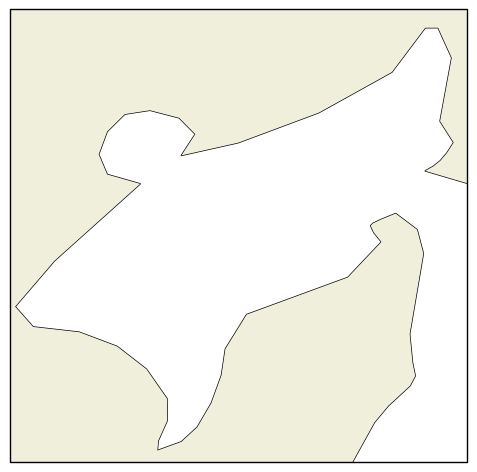

In [9]:
fig = plt.figure(figsize=(10,6), dpi = 100) #tamaño de la figura
ax = fig.add_subplot(111, projection=p) #p es la proyeccion
make_map(fig, ax)
ax.pcolormesh(ncgrd['lon_rho'], ncgrd['lat_rho'], ncgrd['h'], transform=ccrs.PlateCarree())
cbar=plt.colorbar(ax.pcolormesh(ncgrd['lon_rho'], ncgrd['lat_rho'], ncgrd['h'], transform=ccrs.PlateCarree()))
# cbar.set_label('g/kg')
for i in range(0, ds['x_psi'].shape[1], 20):
    for j in range(0,ds['x_psi'].shape[0], 20):
        ax.plot(ncgrd['lon_psi'][::20,i], ncgrd['lat_psi'][::20,i], '-k', lw=0.1, transform=ccrs.PlateCarree())
        ax.plot(ncgrd['lon_psi'][j,::20], ncgrd['lat_psi'][j,::20], '-k', lw=0.1, transform=ccrs.PlateCarree())
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)